In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [0]:
df = pd.read_csv('BankMarket.csv').dropna()
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#poutcome and contact are mostly unknown, hence we drop these columns

df = df.drop(columns = ['contact','poutcome'])

In [0]:
#Reserved for doing categorisation of data

dict = {
    'no': 0,
    'yes': 1
}

dict_edu = {
    'primary': 1,
    'secondary':2,
    'tertiary':3,
}

dict_married = {
    'single': 1,
    'married': 2,
    'divorced': 3,
}

dict_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

dict_job = {
    'admin.': 1,
    'unemployed': 2,
    'management': 3,
    'housemaid': 4,
    'entrepreneur':5,
    "student": 6,
    "blue-collar": 7,
    "self-employed": 8,
    "retired": 9,
    "technician":10,
    "services":11
}
#This kind of classification maps unknown values to NaN, which allows for them to be removed later

df['y'] = df['y'].map(dict)
df['default'] = df['default'].map(dict)
df['housing'] = df['housing'].map(dict)
df['loan'] = df['loan'].map(dict)

df['marital'] = df['marital'].map(dict_married)

df['education'] = df['education'].map(dict_edu)

df['month'] = df['month'].map(dict_month)

df['job'] = df['job'].map(dict_job)

#drop NaN columns
df = df.dropna()
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,3.0,2,3.0,0,2143,1,0,5,5,261,1,-1,0,0
1,44,10.0,1,2.0,0,29,1,0,5,5,151,1,-1,0,0
2,33,5.0,2,2.0,0,2,1,1,5,5,76,1,-1,0,0
5,35,3.0,2,3.0,0,231,1,0,5,5,139,1,-1,0,0
6,28,3.0,1,3.0,0,447,1,1,5,5,217,1,-1,0,0


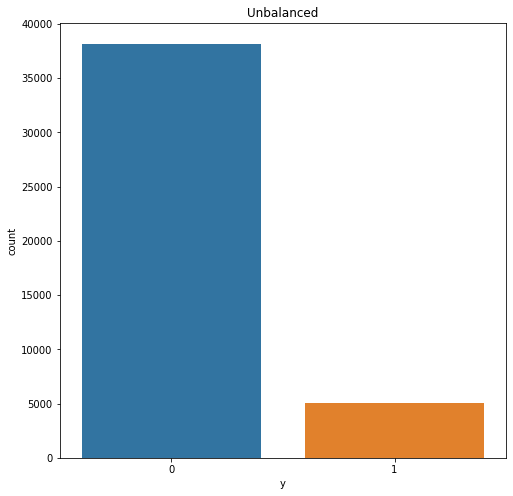

In [0]:
plt.figure(figsize=(8, 8))

sns.countplot('y', data=df)

plt.title('Unbalanced')

plt.show()

In [0]:
#find the number in the minority category
df.y.value_counts()

0    38172
1     5021
Name: y, dtype: int64

In [0]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the yes class in a separate dataset.
yes_df = shuffled_df.loc[shuffled_df['y'] == 1]

#Randomly select ? observations from the no (majority class)
#n = (df.y == 1).count()
#print(n)
no_df = shuffled_df.loc[shuffled_df['y'] == 0].sample(n = 5021,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([yes_df, no_df])

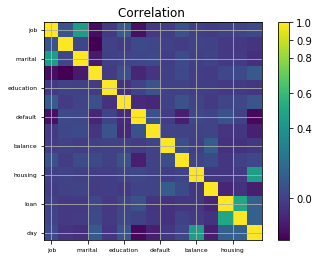

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(normalized_df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=['age','job','marital','education','default','balance','housing','loan','day','month','duration','campaign','pdays','previous','y',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

In [0]:
normalized_df.corr()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
age,1.000000,0.088241,0.443533,-0.188968,-0.024002,0.118012,-0.177010,-0.030758,-0.011730,0.069543,-0.000771,-0.013911,0.003996,0.013811,0.038132
job,0.088241,1.000000,0.024921,-0.234777,0.002316,-0.020951,0.038925,0.027679,0.002217,-0.012209,0.020142,0.008746,-0.029259,-0.032168,-0.042770
marital,0.443533,0.024921,1.000000,-0.146783,-0.000355,0.014678,0.027186,0.044766,-0.007201,0.050587,-0.002880,0.020154,-0.023087,-0.021275,-0.063236
education,-0.188968,-0.234777,-0.146783,1.000000,-0.015186,0.068143,-0.100168,-0.048317,0.001124,0.037688,-0.008658,-0.017630,0.029242,0.044346,0.109781
default,-0.024002,0.002316,-0.000355,-0.015186,1.000000,-0.057957,0.012111,0.081583,0.002950,0.003515,-0.008346,-0.005211,-0.029149,-0.024203,-0.041597
balance,0.118012,-0.020951,0.014678,0.068143,-0.057957,1.000000,-0.086280,-0.090222,0.007526,0.071006,0.018026,-0.026391,0.023313,0.031850,0.091502
housing,-0.177010,0.038925,0.027186,-0.100168,0.012111,-0.086280,1.000000,0.073717,-0.013878,-0.133346,0.034851,0.012341,0.070566,0.006859,-0.208933
loan,-0.030758,0.027679,0.044766,-0.048317,0.081583,-0.090222,0.073717,1.000000,0.020073,0.003658,0.005422,0.019355,-0.046286,-0.035409,-0.127282
day,-0.011730,0.002217,-0.007201,0.001124,0.002950,0.007526,-0.013878,0.020073,1.000000,0.062251,-0.003501,0.128726,-0.060820,-0.055240,-0.036681
month,0.069543,-0.012209,0.050587,0.037688,0.003515,0.071006,-0.133346,0.003658,0.062251,1.000000,0.012574,0.042427,-0.041533,0.010870,0.030284


In [0]:
from sklearn.model_selection import train_test_split

x = normalized_df[['housing', 'loan',]]
y = normalized_df['y']

x.head()

,housing,loan
41787,0,0
40757,0,0
36829,1,1
44098,0,0
22465,0,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

x_train.head()

,housing,loan
38116,1,1
11846,1,1
40076,0,0
32802,0,0
499,1,0


In [0]:
from sklearn.svm import SVC

svClassifier = SVC(kernel = 'linear')
svClassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_test

30946    0
35016    0
42516    1
41660    0
31914    1
24395    0
42285    1
35447    1
43105    1
27202    0
44258    1
6671     0
40119    1
31971    0
35991    0
42140    1
43609    1
44207    1
666      0
38926    1
14153    1
3376     0
43961    1
43879    1
40306    0
44487    1
43552    1
8607     0
42827    0
41550    1
        ..
43363    1
15932    1
44082    1
22038    0
43794    1
30278    0
44975    1
20695    0
14178    0
18359    0
17245    1
24527    1
19653    0
33907    1
33584    0
31043    1
8079     0
33886    1
19157    1
41356    0
12972    0
44474    1
37456    0
31283    1
25207    0
40157    1
2439     0
8011     0
5388     0
6981     0
Name: y, Length: 2511, dtype: int64

In [0]:
y_pred = svClassifier.predict(x_test)
y_pred # predicted result

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [0]:
from sklearn.metrics import accuracy_score
# show how accurate the model can predict
accuracy_score(y_test, y_pred)

0.6121067303863003

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[735, 509],
       [465, 802]], dtype=int64)

In [0]:
#This section is for another set of variables _Just using housing

x = normalized_df[['housing',]]
y = normalized_df['y']

x.head()

,housing
41787,0
40757,0
36829,1
44098,0
22465,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

x_train.head()

,housing
38116,1
11846,1
40076,0
32802,0
499,1


In [0]:
svClassifier = SVC(kernel = 'linear')
svClassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svClassifier.predict(x_test)

accuracy_score(y_test, y_pred)

0.6121067303863003

In [0]:
confusion_matrix(y_test, y_pred)

array([[735, 509],
       [465, 802]], dtype=int64)

In [0]:
#This section is for another set of variables _Just using education

x = normalized_df[['education',]]
y = normalized_df['y']

x.head()

,education
41787,3.0
40757,3.0
36829,2.0
44098,1.0
22465,2.0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

x_train.head()

,education
38116,2.0
11846,3.0
40076,3.0
32802,1.0
499,2.0


In [0]:
svClassifier = SVC(kernel = 'linear')
svClassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svClassifier.predict(x_test)

accuracy_score(y_test, y_pred)

0.5264834727200318

In [0]:
confusion_matrix(y_test, y_pred)

array([[ 209, 1035],
       [ 154, 1113]], dtype=int64)